In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [6]:
datafiles = glob.glob('../../radiometer/ReadoutApp/Data/2017-11-10*.txt')

In [7]:
datafiles.sort()

In [8]:
datafiles

['../../radiometer/ReadoutApp/Data/2017-11-10_14:23:21heatgun1_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-10_14:27:48heatgun1_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-10_14:34:04_Temp_Relationship_Readout.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-10_14:56:37_Readoutplzworkj.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-10_14:57:04_Readout_Temp_Rel.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-10_15:08:21__Readout_Temp_Rel_Other_Box.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-10_15:21:43__Readout_Temp_Rel_Other_Box_Cold.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-10_15:28:28__Readout_Calib_RoomTemp.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-10_15:34:17__Readout_Calib_RoomTemp2.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-10_15:41:38__Readout_Calib_RoomTemp2nitrogen.txt']

In [35]:
x = np.loadtxt('../../radiometer/ReadoutApp/Data/2017-11-10_15:41:38__Readout_Calib_RoomTemp2nitrogen.txt')

In [75]:
times = x[:, 0]
radiodata = x[:, 1]
temperature = x[:, 2]

In [76]:
times-=times[0]

In [47]:
times=times[1000*len(times)/1400:]
radiodata=radiodata[1000*len(radiodata)/1400:]
temperature=temperature[1000*len(temperature)/1400:]

In [78]:
times=times[:300*len(times)/900]
radiodata=radiodata[:300*len(radiodata)/900]
temperature=temperature[:300*len(temperature)/900]

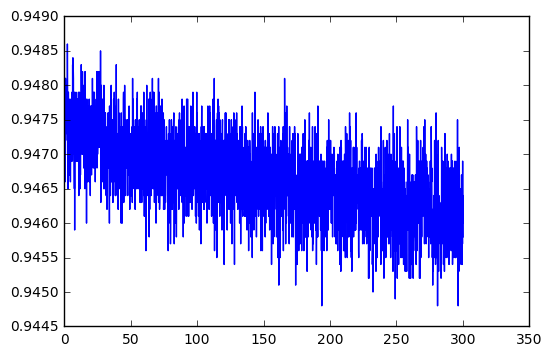

In [79]:
plot(times, radiodata)

(300, 303)

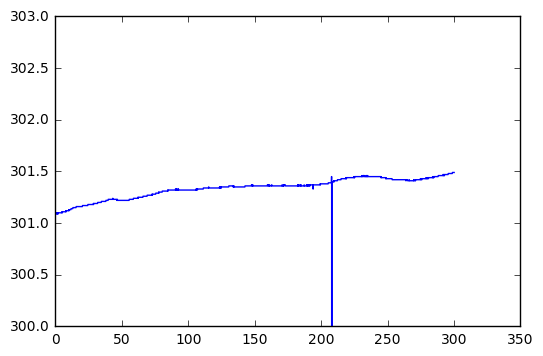

In [82]:
plot(times, temperature)
ylim(300,303)

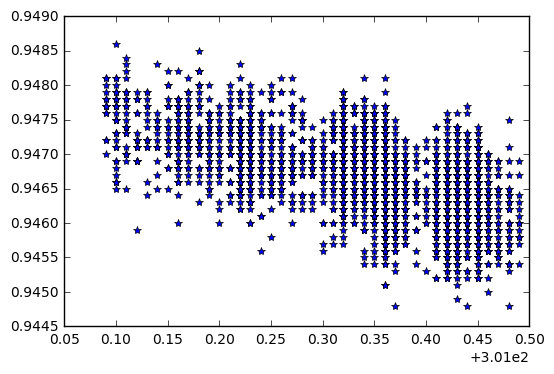

In [83]:
mask=temperature<100
plot(temperature[~mask], radiodata[~mask],'*')

In [13]:
x = np.loadtxt( '../../radiometer/ReadoutApp/Data/2017-11-03_15:07:24sky_manual_dip.txt')

In [14]:
times = x[:, 0]
radiodata = x[:, 1]
temperature = x[:, 2]

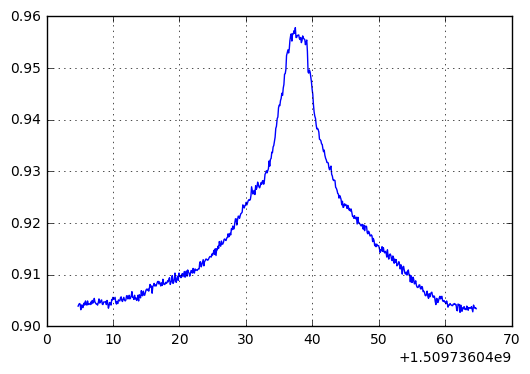

In [16]:
plot(times, radiodata)
grid()

In [25]:
datafiles = glob.glob('../../radiometer/ReadoutApp/Data/2017-11-03_1*sky*.txt')[0:13]
datafiles = [x for x in datafiles if "return" not in x]

In [26]:
datafiles

['../../radiometer/ReadoutApp/Data/2017-11-03_14:17:55sky00.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_14:20:32sky10.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_14:21:46sky20.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_14:23:37sky30.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_14:25:07sky40.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_14:26:30sky50.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_14:28:04sky60.txt']

In [33]:
datafiles[-1].split('sky')

['../../radiometer/ReadoutApp/Data/2017-11-03_14:28:04', '60.txt']

In [34]:
x = {}
for dfile in datafiles:
    x[dfile.split('sky')[-1].split(".")[0]] = np.loadtxt(dfile)

In [37]:
print (x.keys())

['10', '00', '20', '30', '50', '40', '60']


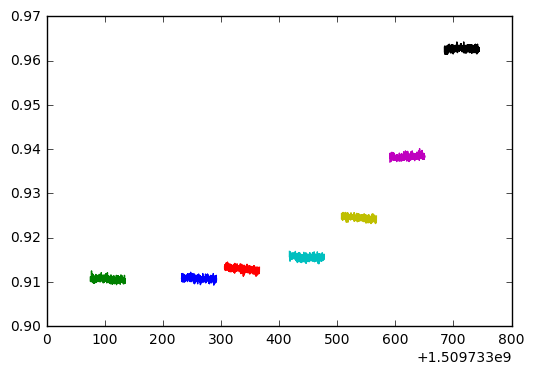

In [38]:
for key in x.keys():
    plot(x[key][:, 0], x[key][:, 1])

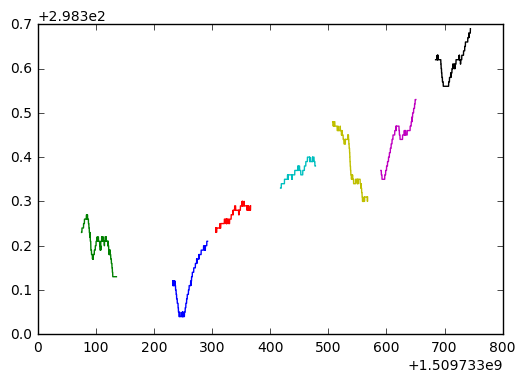

In [39]:
for key in x.keys():
    plot(x[key][:, 0], x[key][:, 2])

In [39]:
key.split('_')[-1].split('.')[0]

'00'

In [49]:
x.keys()

['quick_return_45.txt',
 'quick_30.txt',
 'quick_return_15.txt',
 'quick_15.txt',
 'quick_45.txt',
 'quick_return_30.txt',
 'quick_00.txt',
 'quick_return_00.txt']

In [42]:
radiomean = []
angles = []
for key in x.keys():
    angles.append(float(key))
    radiomean.append(np.mean(x[key][:, 1]))
angles = np.array(angles)
radiomean = np.array(radiomean)

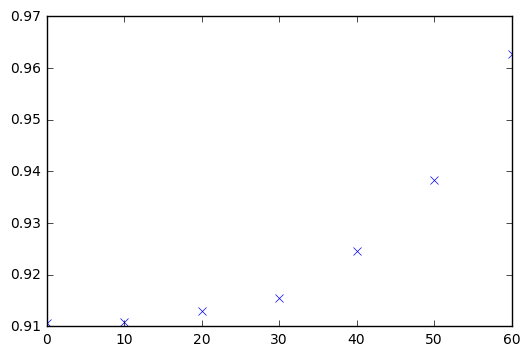

In [43]:
plot(angles,radiomean, 'x')

In [77]:
radiomean

array([ 0.92201919,  0.90938182,  0.90347677,  0.9052404 ,  0.92268687,
        0.90839293,  0.90395354,  0.90390404])

In [44]:
depth = 1. / np.cos(np.array(angles) * pi / 180.)

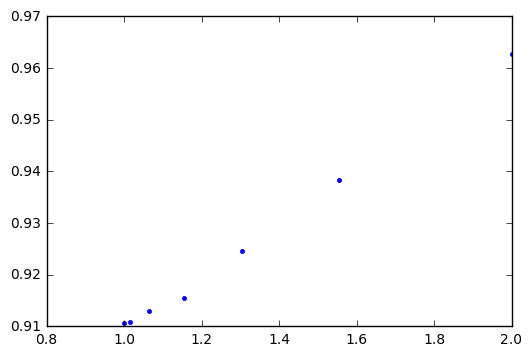

In [45]:
plot(depth, radiomean, '.')

In [46]:
from scipy.optimize import curve_fit

In [47]:
def line(x, m, b):
    return m * x + b

In [55]:
params, cov = curve_fit(line, depth, radiomean)

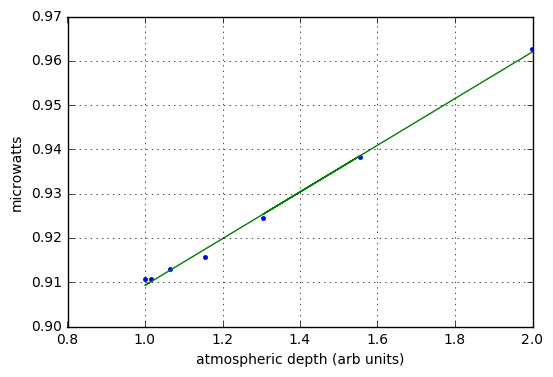

In [56]:
plot(depth, radiomean, '.')
plot(depth, line(depth, *params))
grid()
xlabel('atmospheric depth (arb units)')
ylabel('microwatts')

In [57]:
cmb_radio = params[1]

In [58]:
cmb_radio

0.85655802269778869

In [95]:
# 85 nano Watts

In [85]:
boxfiles = glob.glob('../../radiometer/ReadoutApp/Data/2017-11-03_14:4*box*.txt')

In [86]:
boxfiles

['../../radiometer/ReadoutApp/Data/2017-11-03_14:40:41box_return00.txt']

In [89]:
xb = {}
for dfile in boxfiles:
    xb[dfile.split('/')[-1]] = np.loadtxt(dfile)

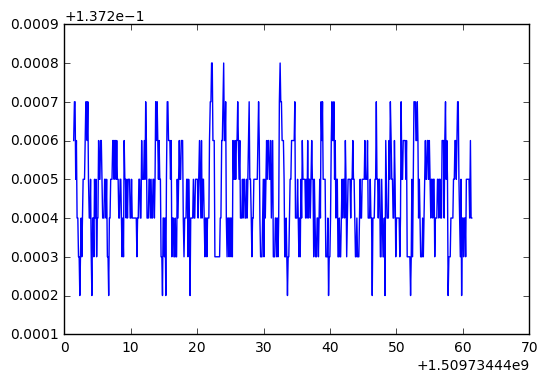

In [90]:
for key in xb.keys():
    plot(xb[key][:, 0], xb[key][:, 1])
    #plot(xn[key][:, 0]-xn[key][:, 0][0], xn[key][:, 1])

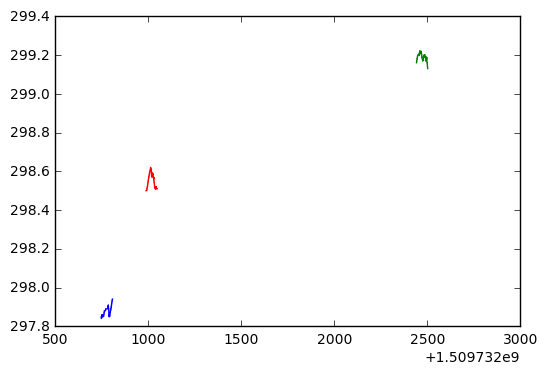

In [63]:
for key in xb.keys():
    plot(xb[key][:, 0], xb[key][:, 2])
    #plot(xn[key][:, 0]-xn[key][:, 0][0], xn[key][:, 1])

In [64]:
boxradios = []
for key in xb.keys():
    boxradios = np.concatenate([boxradios, xb[key][:, 1]])

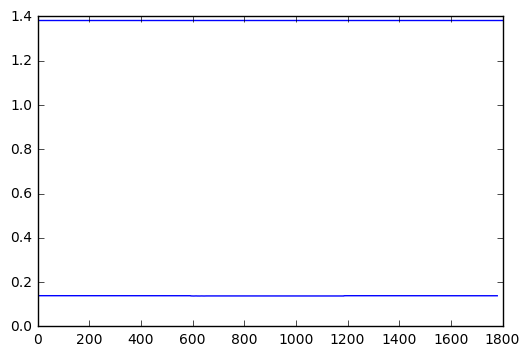

In [91]:
plot(boxradios)
axhline(boxradiomean)

In [92]:
boxradiomean = np.mean(boxradios) * 10. 

In [93]:
boxradiomean

1.3842000000000001

In [98]:
nitroradio = []
for key in xn.keys():
    nitroradio = np.concatenate([nitroradio, xn[key][:, 1]])

In [99]:
nitroradiomean = np.mean(nitroradio)

In [100]:
nitroradiomean

0.99777296233839252

In [101]:
nitrotemp = 77.45
boxtemp = 298.6

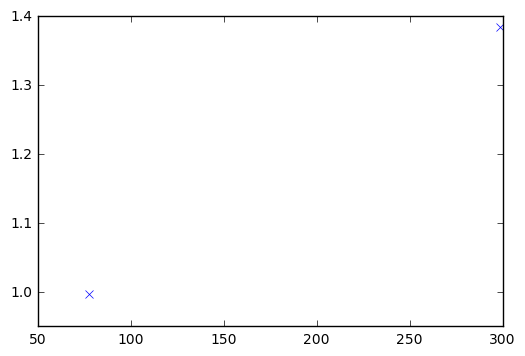

In [103]:
plot([boxtemp, nitrotemp], [boxradiomean, nitroradiomean], 'x')

In [104]:
slope = (boxtemp - nitrotemp) / (boxradiomean - nitroradiomean)

In [105]:
b = boxtemp - slope * boxradiomean

In [106]:
rmeans = np.array([nitroradiomean, boxradiomean])

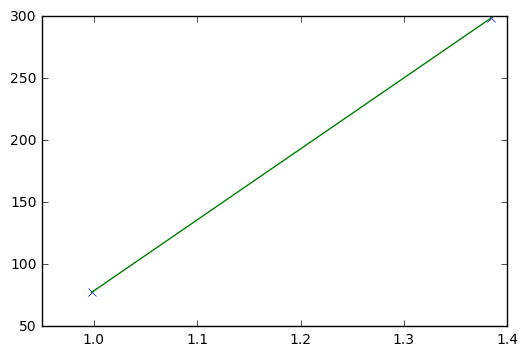

In [107]:
plot([nitroradiomean, boxradiomean], [nitrotemp, boxtemp], 'x')
plot(rmeans, slope * rmeans + b)

In [108]:
cmb_temp = slope * cmb_radio + b

In [109]:
cmb_temp

-3.3665083129282607

In [94]:
nitrofiles = glob.glob('../../radiometer/ReadoutApp/Data/2017-11-03_14:4*nitro*.txt')

In [95]:
nitrofiles

['../../radiometer/ReadoutApp/Data/2017-11-03_14:44:00nitrogen_00.txt']

In [96]:
xn = {}
for dfile in nitrofiles:
    xn[dfile.split('/')[-1]] = np.loadtxt(dfile)

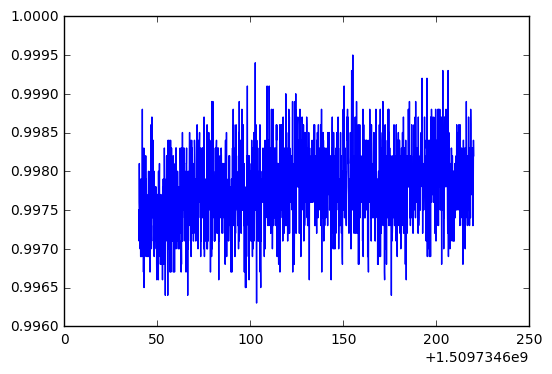

In [97]:
for key in xn.keys():
    plot(xn[key][:, 0], xn[key][:, 1])
    #plot(xn[key][:, 0]-xn[key][:, 0][0], xn[key][:, 1])

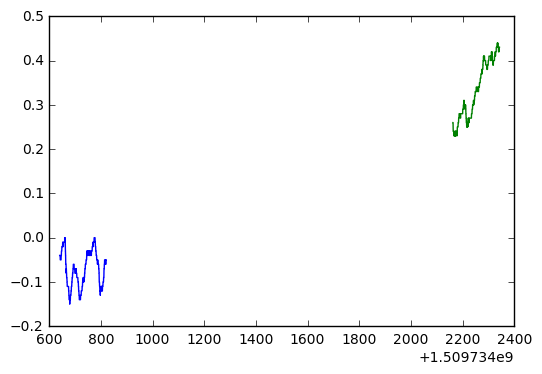

In [73]:
for key in xn.keys():
    plot(xn[key][:, 0], xn[key][:, 2]-299.)
    #plot(xn[key][:, 0]-xn[key][:, 0][0], xn[key][:, 1])

In [ ]:
`